In [165]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# khnp_buoy_train

In [153]:
khnp_buoy_train = pd.read_csv("../data/weather_data/processed/khnp_buoy_train(수정).csv",encoding='cp949').drop('Unnamed: 0', axis=1)
print(khnp_buoy_train.shape)
khnp_buoy_train.head()

(786240, 4)


,시간,지점명,유속,유향
0,202101010000,Gori,37.0,84
1,202101010001,Gori,27.8,88
2,202101010002,Gori,39.3,84
3,202101010003,Gori,26.5,86
4,202101010004,Gori,36.6,85


In [154]:
khnp_buoy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786240 entries, 0 to 786239
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시간      786240 non-null  int64  
 1   지점명     786240 non-null  object 
 2   유속      786240 non-null  float64
 3   유향      786240 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.0+ MB


## 시간

### 포맷 변환

In [155]:
khnp_buoy_train['시간']

0         202101010000
1         202101010001
2         202101010002
3         202101010003
4         202101010004
              ...     
786235    202206302355
786236    202206302356
786237    202206302357
786238    202206302358
786239    202206302359
Name: 시간, Length: 786240, dtype: int64

In [156]:
khnp_buoy_train['시간']=pd.to_datetime(khnp_buoy_train['시간'], format='%Y%m%d%H%M')
khnp_buoy_train['시간']

0        2021-01-01 00:00:00
1        2021-01-01 00:01:00
2        2021-01-01 00:02:00
3        2021-01-01 00:03:00
4        2021-01-01 00:04:00
                 ...        
786235   2022-06-30 23:55:00
786236   2022-06-30 23:56:00
786237   2022-06-30 23:57:00
786238   2022-06-30 23:58:00
786239   2022-06-30 23:59:00
Name: 시간, Length: 786240, dtype: datetime64[ns]

### 날짜_시간 SPLIT

In [157]:
khnp_buoy_train['날짜_시간']=khnp_buoy_train['시간']
khnp_buoy_train['날짜']=khnp_buoy_train['시간'].apply(lambda x : str(x).split()[0])
khnp_buoy_train['시간']=khnp_buoy_train['시간'].apply(lambda x : str(x).split()[1])

In [158]:
khnp_buoy_train = khnp_buoy_train[['날짜_시간', '날짜', '시간', '지점명', '유속', '유향']]
khnp_buoy_train

,날짜_시간,날짜,시간,지점명,유속,유향
0,2021-01-01 00:00:00,2021-01-01,00:00:00,Gori,37.0,84
1,2021-01-01 00:01:00,2021-01-01,00:01:00,Gori,27.8,88
2,2021-01-01 00:02:00,2021-01-01,00:02:00,Gori,39.3,84
3,2021-01-01 00:03:00,2021-01-01,00:03:00,Gori,26.5,86
4,2021-01-01 00:04:00,2021-01-01,00:04:00,Gori,36.6,85
...,...,...,...,...,...,...
786235,2022-06-30 23:55:00,2022-06-30,23:55:00,Gori,56.8,47
786236,2022-06-30 23:56:00,2022-06-30,23:56:00,Gori,60.9,53
786237,2022-06-30 23:57:00,2022-06-30,23:57:00,Gori,59.0,42
786238,2022-06-30 23:58:00,2022-06-30,23:58:00,Gori,65.2,47


In [159]:
khnp_buoy_train[khnp_buoy_train.duplicated()==True].count()

날짜_시간    0
날짜       0
시간       0
지점명      0
유속       0
유향       0
dtype: int64

### 시간 결측치 확인

In [160]:
time = pd.date_range(start='2021-01-01 00:00:00', end='2022-06-30 23:59:00', freq='1min')
time_range = pd.DataFrame(time, columns=['날짜_시간'])
print(khnp_buoy_train['날짜_시간'].count())
print(np.sum(time_range.isin(khnp_buoy_train['날짜_시간'])))

786240
날짜_시간    786240
dtype: int64


#### 시간 2021-01-01 ~ 2022-06-30

## 지점명

In [161]:
khnp_buoy_train['지점명'].unique()

array(['Gori'], dtype=object)

#### 지점명 고리(부산)

## 유속, 유향

### 이상치 -999.0 제거

In [188]:
print(khnp_buoy_train['날짜_시간'].min())
print(khnp_buoy_train['날짜_시간'].max())

print(khnp_buoy_train['유속'].min())
print(khnp_buoy_train['유속'].max())

print(khnp_buoy_train['유향'].min())
print(khnp_buoy_train['유향'].max())

2021-01-01 00:00:00
2022-06-30 23:59:00
-999.0
127.0
-999
360


In [189]:
print(khnp_buoy_train[khnp_buoy_train['유속']!=-999.0]['유속'].min())
print(khnp_buoy_train[khnp_buoy_train['유속']!=-999.0]['유속'].max())

print(khnp_buoy_train[khnp_buoy_train['유향']!=-999.0]['유향'].min())
print(khnp_buoy_train[khnp_buoy_train['유향']!=-999.0]['유향'].max())

0.0
127.0
0
360


#### 유속 0.0-127.0

#### 유향 0-360

In [164]:
khnp_buoy_train.to_csv("../data/weather_data/preprocessed_data/khnp_buoy_train.csv",encoding='cp949')

## 시각화

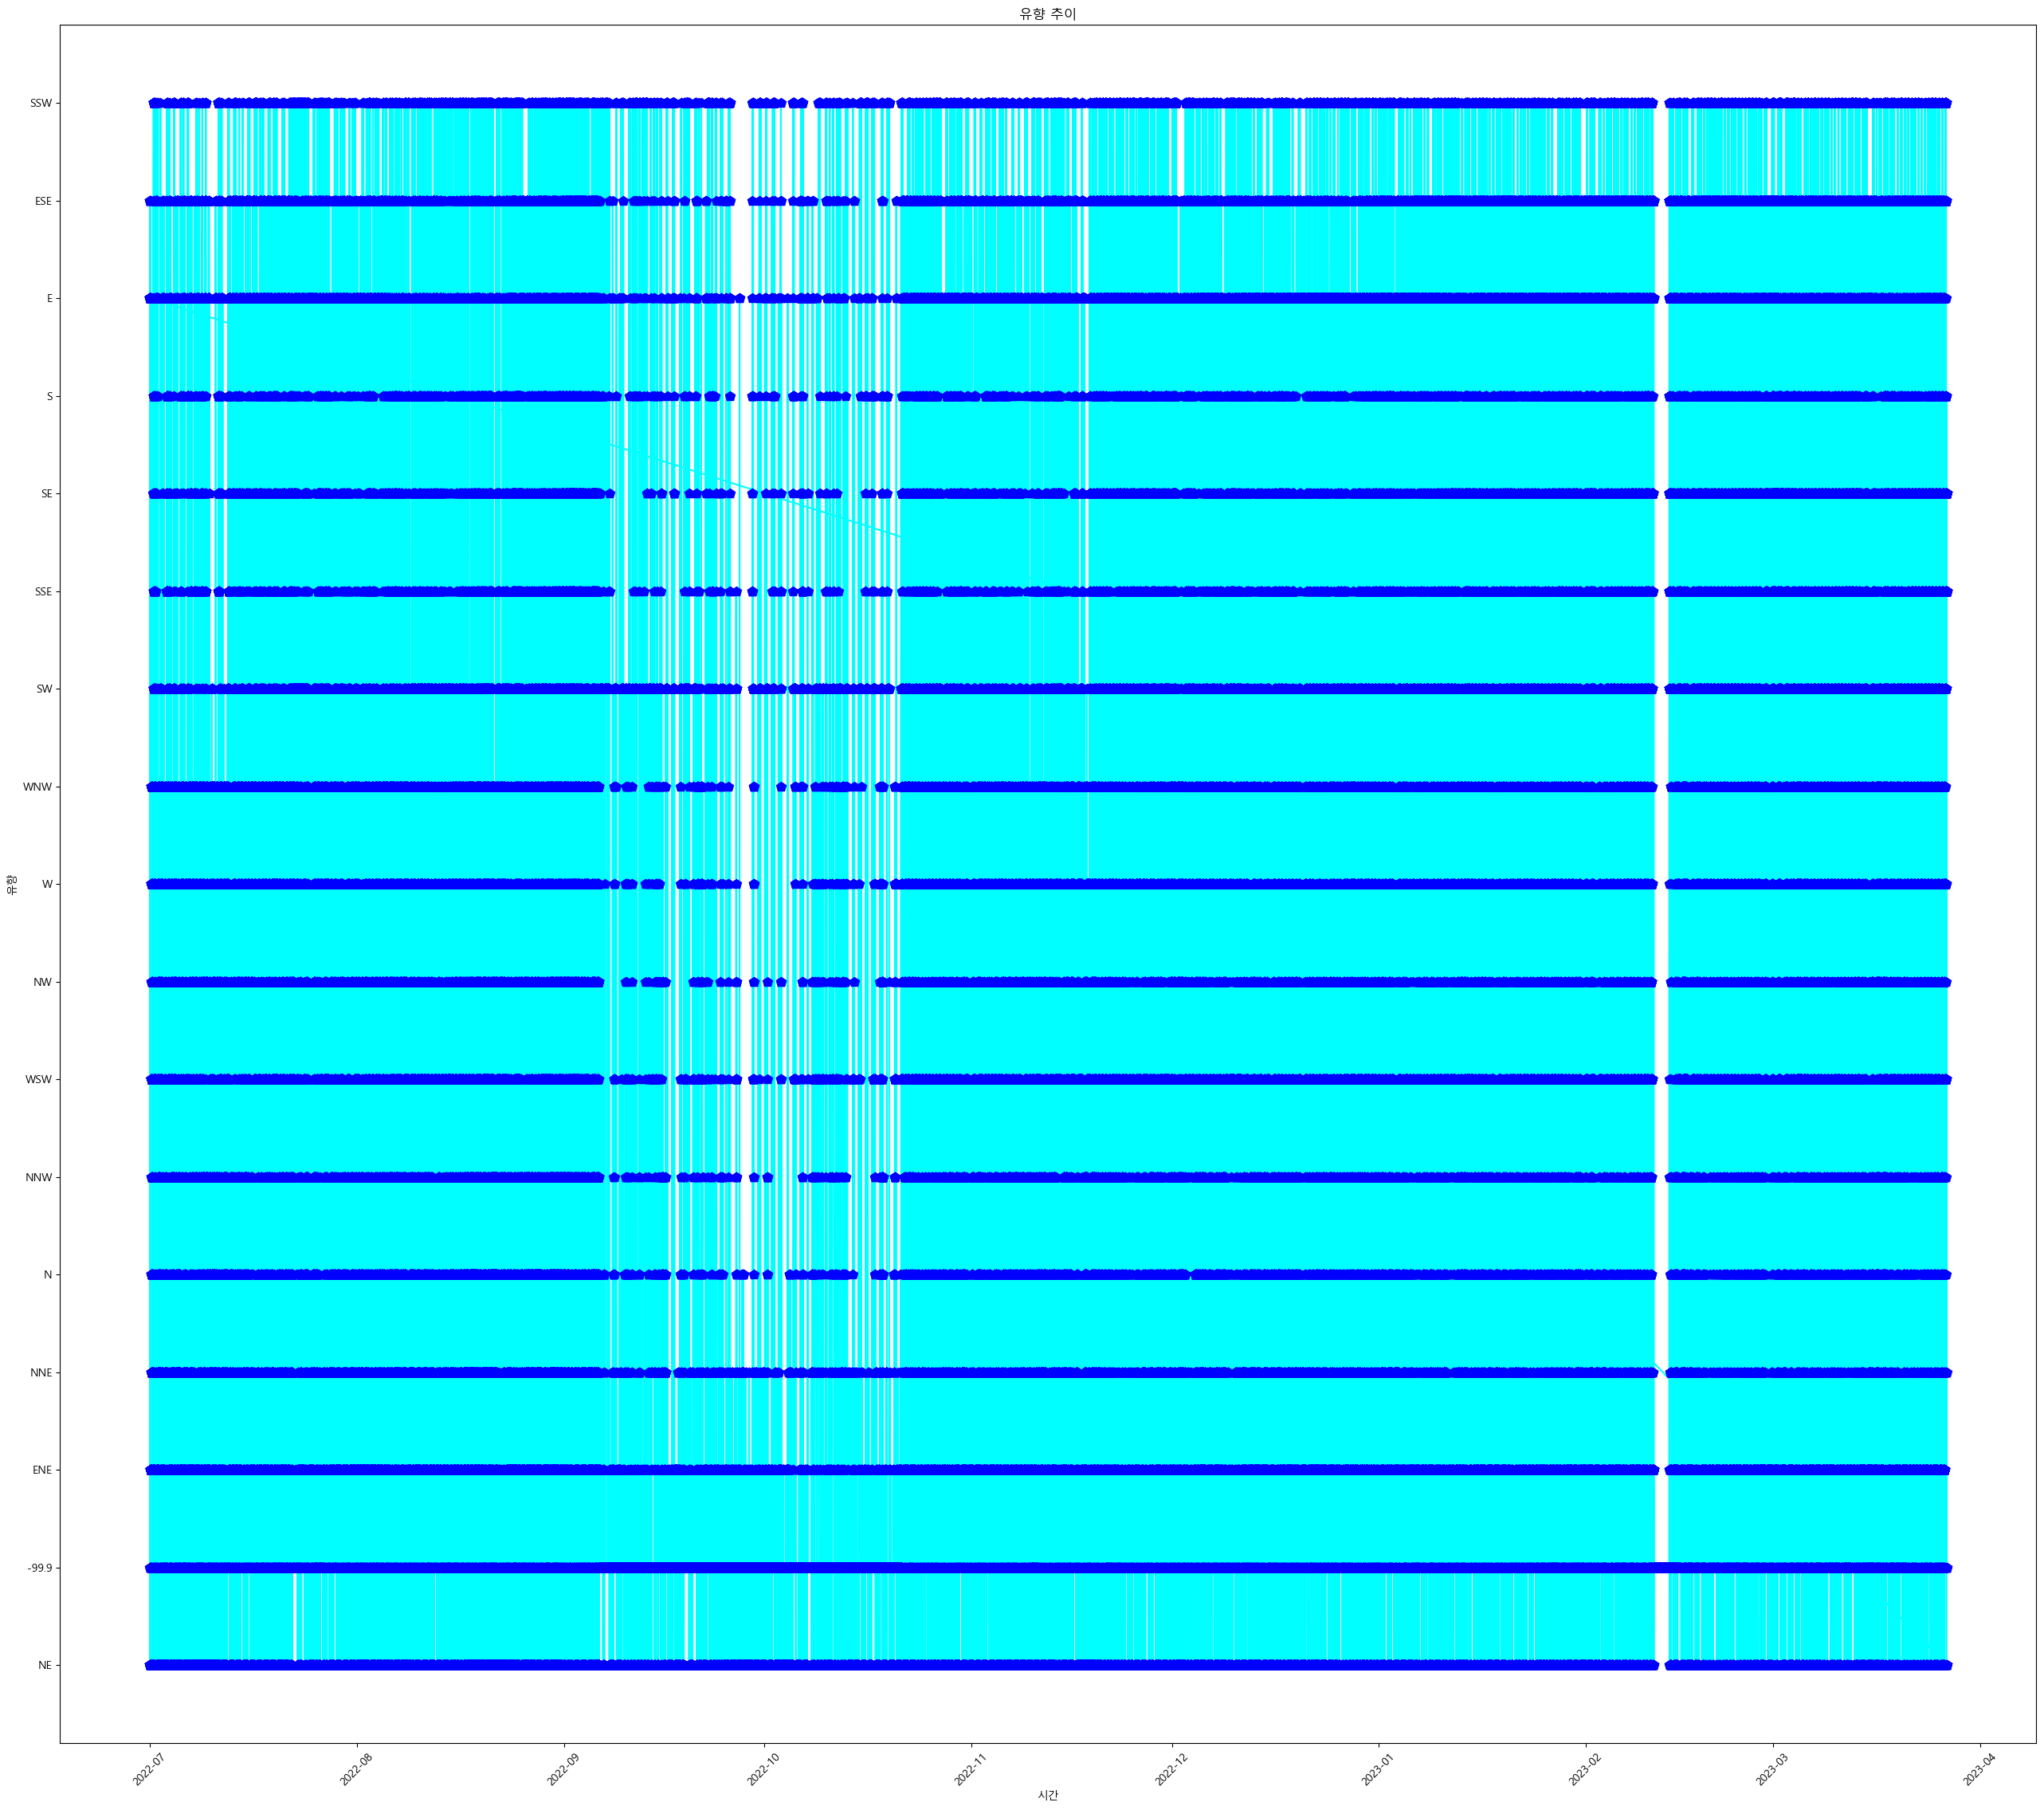

In [173]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(khoa_buoy_test_999['시간'], khoa_buoy_test_999['유향'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('유향 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유향')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [174]:
filtered_df = khoa_buoy_test_999[khoa_buoy_test['시간'].between('2022-07-01 00:00:00', '2022-07-01 23:59:59')]
filtered_df

,시간,지점명,유속,유향,우행
0,2022-07-01 00:00:00,SongJeong,102.7,NE,52.0
1,2022-07-01 00:05:00,SongJeong,101.6,NE,52.0
2,2022-07-01 00:10:00,SongJeong,98.9,NE,51.0
3,2022-07-01 00:15:00,SongJeong,98.3,NE,53.0
4,2022-07-01 00:20:00,SongJeong,96.3,NE,53.0
...,...,...,...,...,...
54427,2022-07-01 23:55:00,Haeundae,34.6,E,81.0
54428,2022-07-01 23:56:00,Haeundae,34.1,E,79.0
54429,2022-07-01 23:57:00,Haeundae,32.2,ENE,78.0
54430,2022-07-01 23:58:00,Haeundae,31.7,ENE,76.0


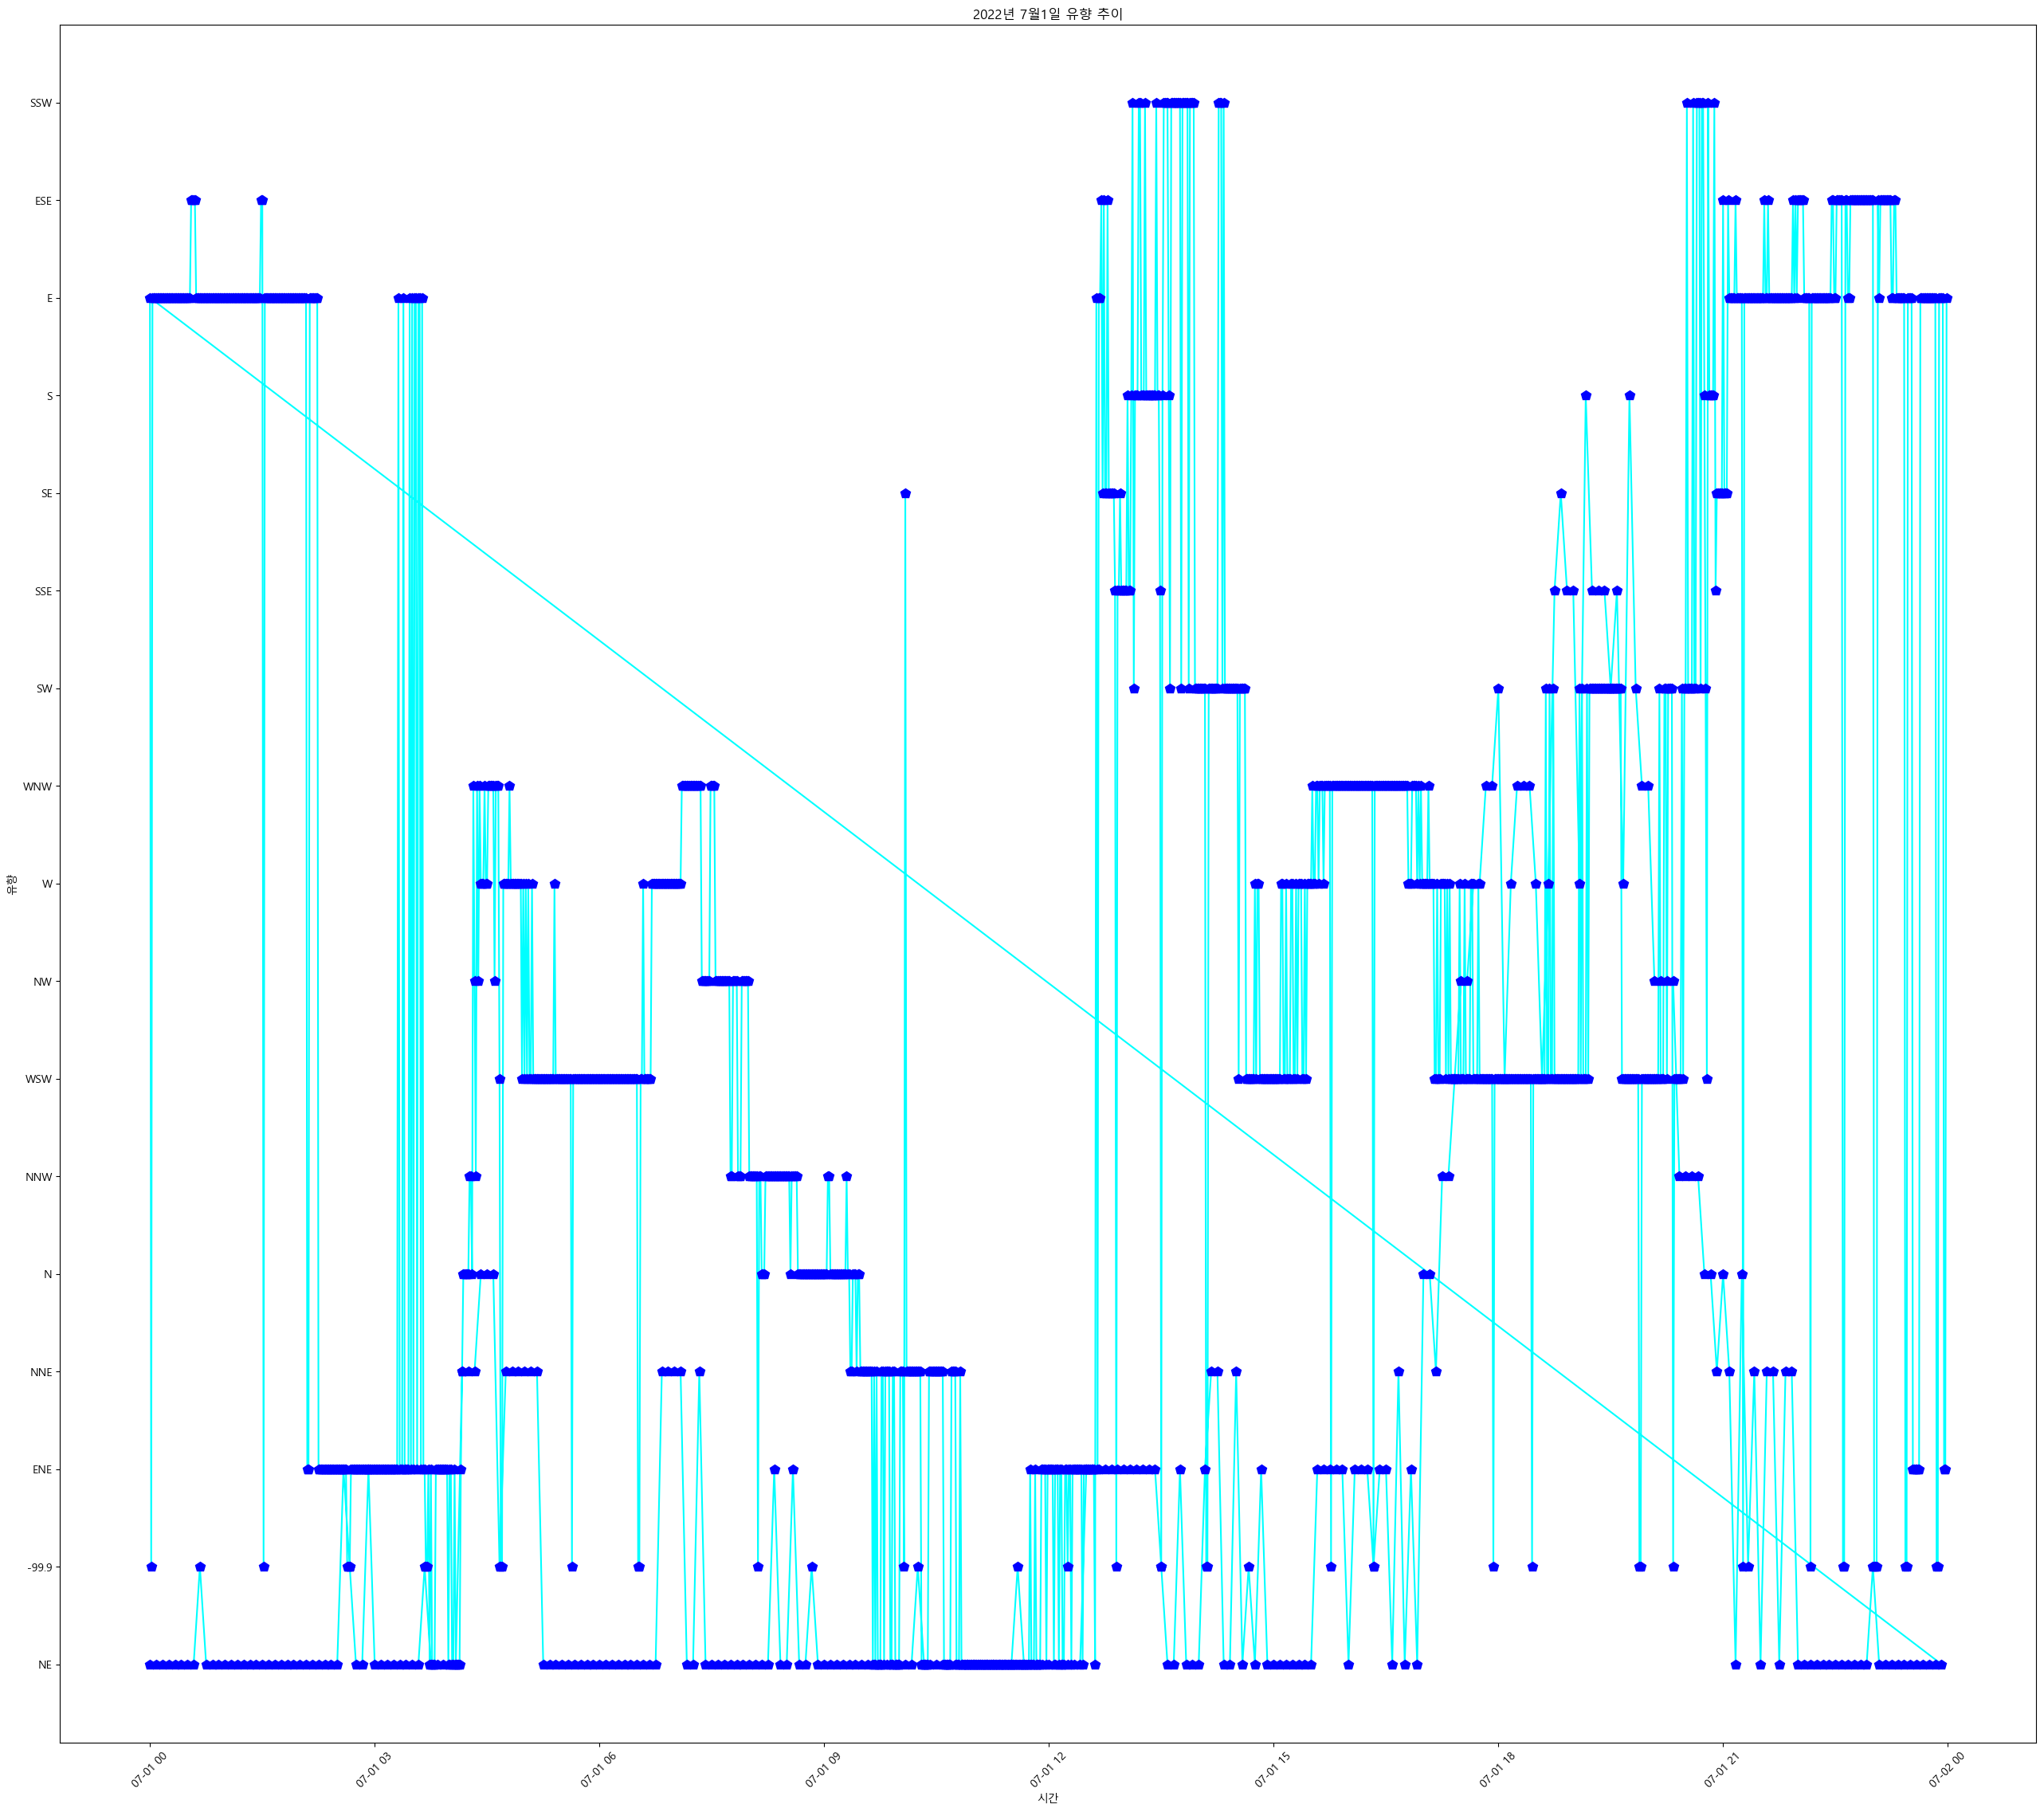

In [175]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(filtered_df['시간'], filtered_df['유향'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('2022년 7월1일 유향 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유향')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

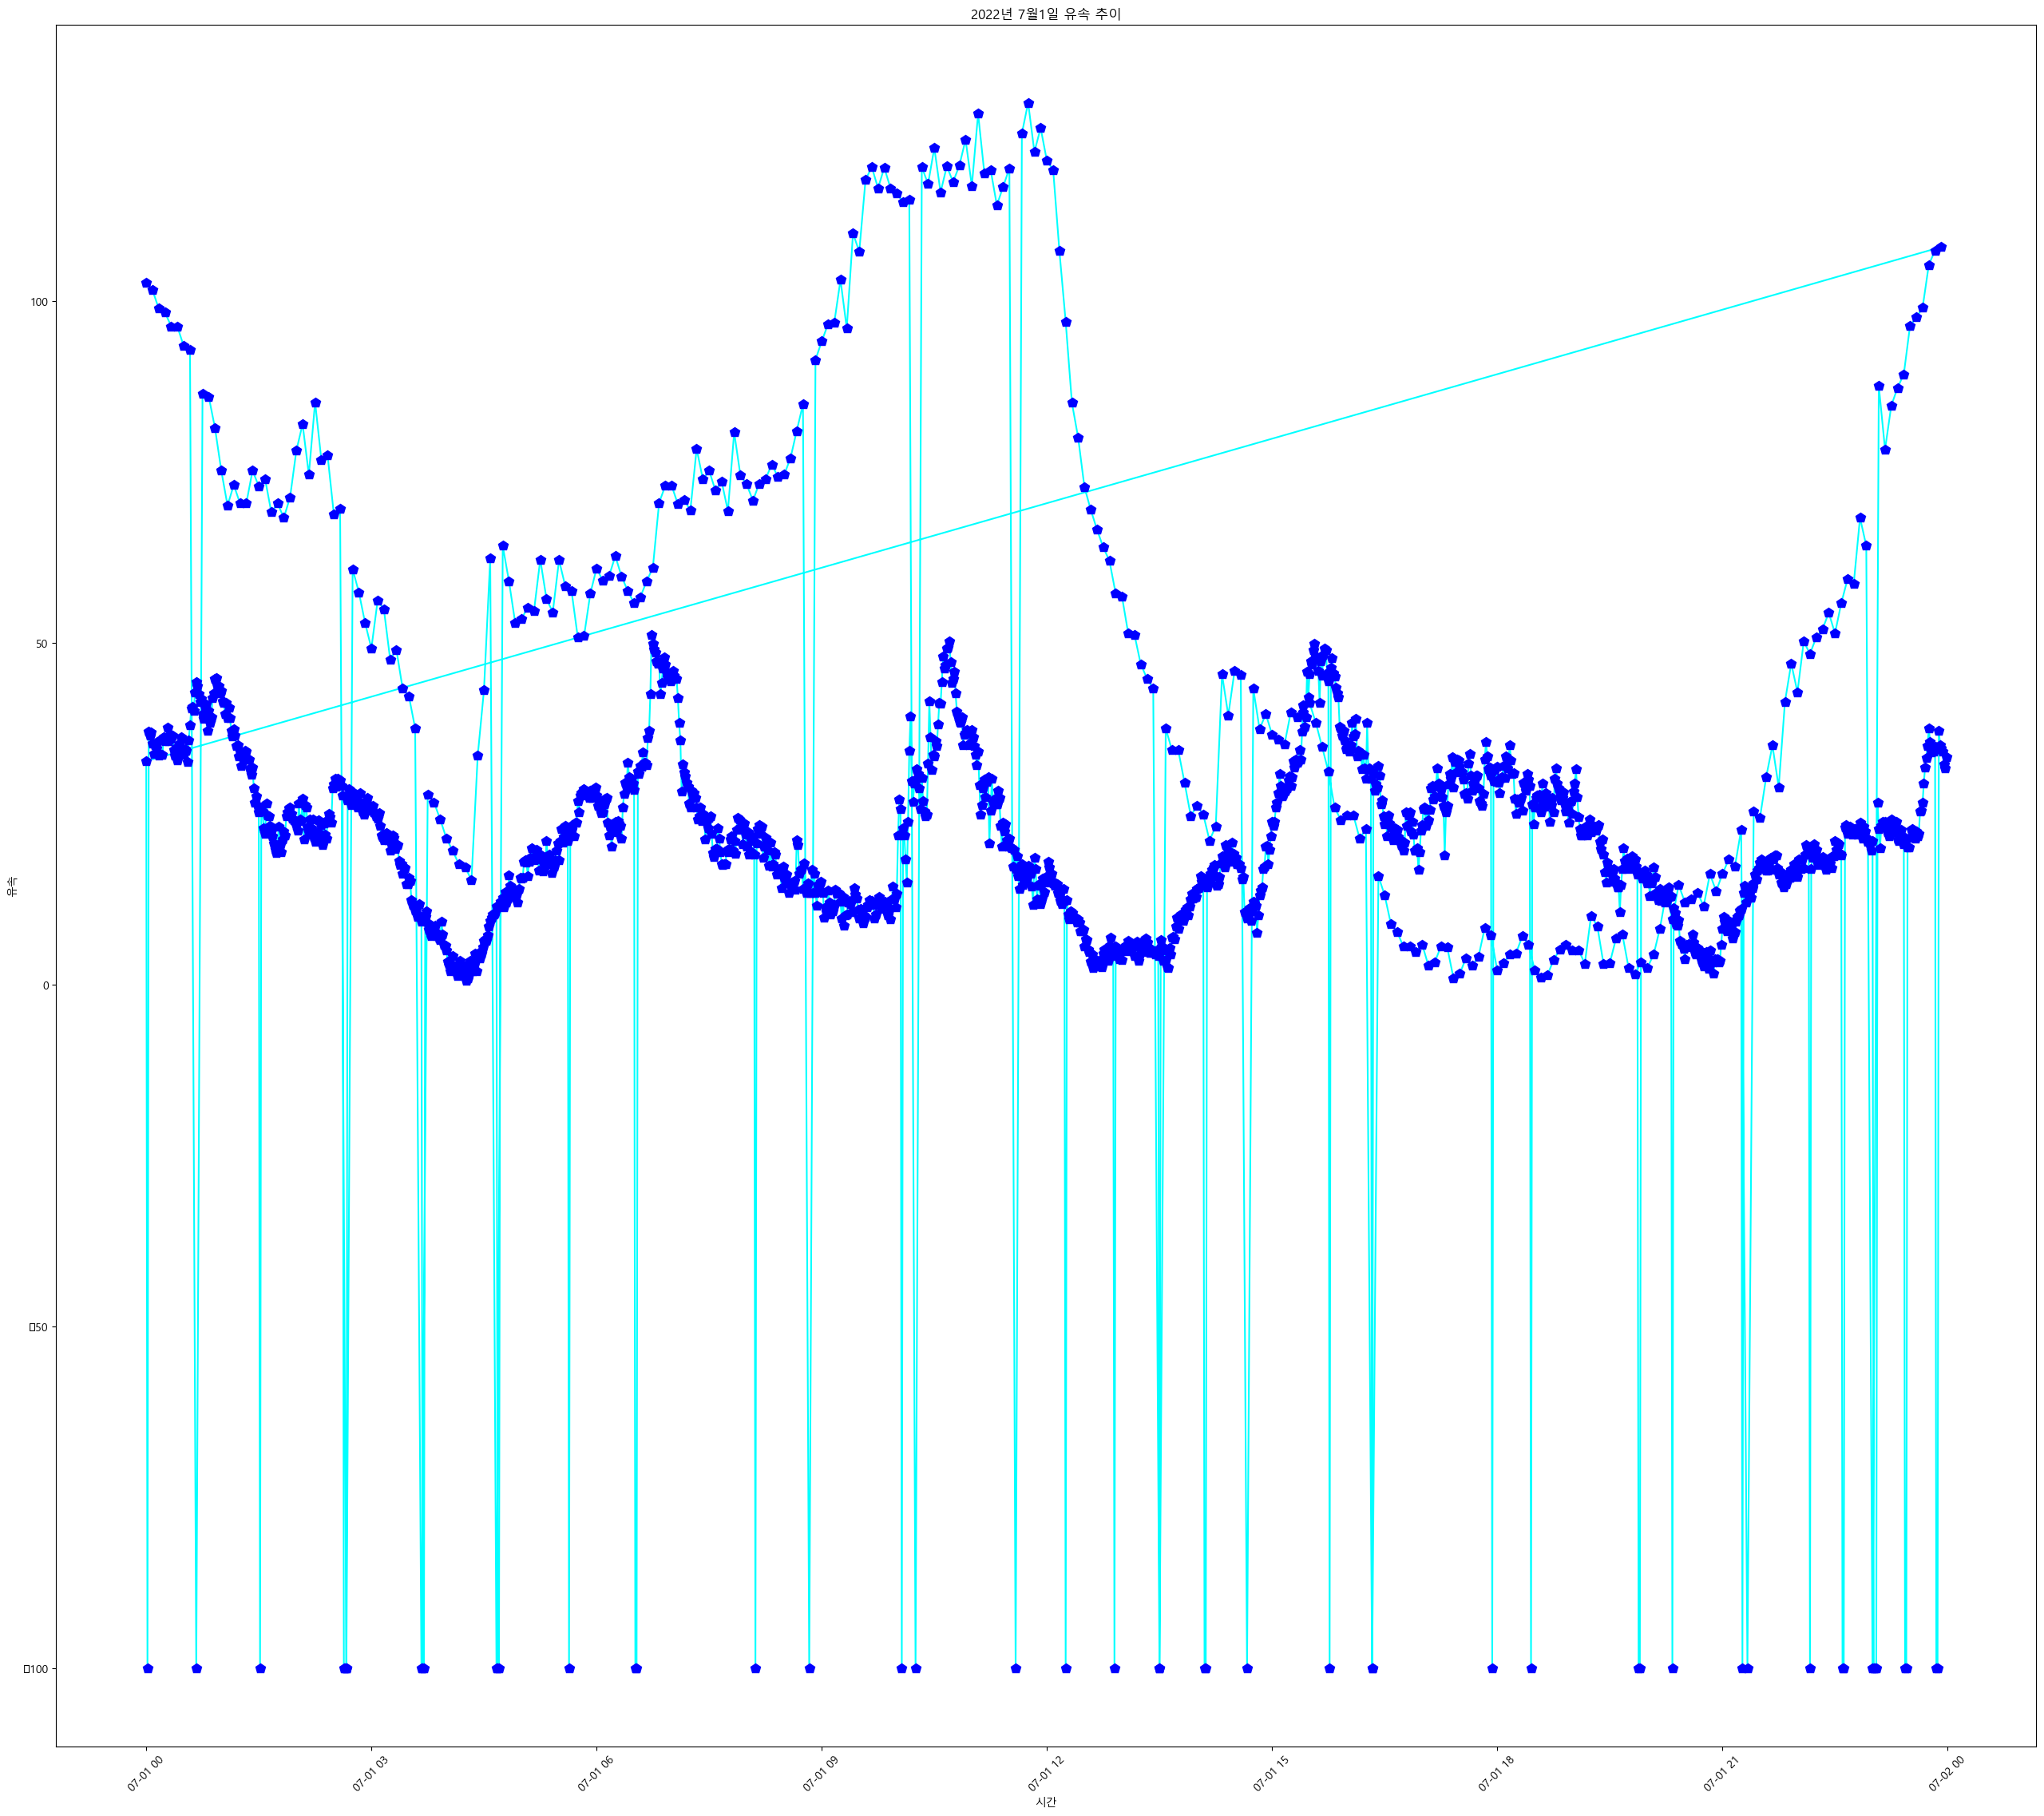

In [176]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(filtered_df['시간'], filtered_df['유속'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('2022년 7월1일 유속 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유속')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

# khnp_buoy_test

In [190]:
khnp_buoy_test = pd.read_csv("../data/weather_data/processed/khnp_buoy_test(수정).csv",encoding='cp949').drop('Unnamed: 0', axis=1)
print(khnp_buoy_test.shape)
khnp_buoy_test.head()

(394560, 4)


,시간,지점명,유속,유향
0,202207010000,Gori,59.7,40
1,202207010001,Gori,67.4,48
2,202207010002,Gori,61.5,60
3,202207010003,Gori,62.3,51
4,202207010004,Gori,65.6,58


In [191]:
khnp_buoy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394560 entries, 0 to 394559
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시간      394560 non-null  int64  
 1   지점명     394560 non-null  object 
 2   유속      394560 non-null  float64
 3   유향      394560 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.0+ MB


## 시간

### 포맷 변환

In [192]:
khnp_buoy_test['시간']

0         202207010000
1         202207010001
2         202207010002
3         202207010003
4         202207010004
              ...     
394555    202303312355
394556    202303312356
394557    202303312357
394558    202303312358
394559    202303312359
Name: 시간, Length: 394560, dtype: int64

In [193]:
khnp_buoy_test['시간']=pd.to_datetime(khnp_buoy_test['시간'], format='%Y%m%d%H%M')
khnp_buoy_test['시간']

0        2022-07-01 00:00:00
1        2022-07-01 00:01:00
2        2022-07-01 00:02:00
3        2022-07-01 00:03:00
4        2022-07-01 00:04:00
                 ...        
394555   2023-03-31 23:55:00
394556   2023-03-31 23:56:00
394557   2023-03-31 23:57:00
394558   2023-03-31 23:58:00
394559   2023-03-31 23:59:00
Name: 시간, Length: 394560, dtype: datetime64[ns]

### 날짜_시간 SPLIT

In [194]:
khnp_buoy_test['날짜_시간']=khnp_buoy_test['시간']
khnp_buoy_test['날짜']=khnp_buoy_test['시간'].apply(lambda x : str(x).split()[0])
khnp_buoy_test['시간']=khnp_buoy_test['시간'].apply(lambda x : str(x).split()[1])

In [195]:
khnp_buoy_test = khnp_buoy_test[['날짜_시간', '날짜', '시간', '지점명', '유속', '유향']]
khnp_buoy_test

,날짜_시간,날짜,시간,지점명,유속,유향
0,2022-07-01 00:00:00,2022-07-01,00:00:00,Gori,59.7,40
1,2022-07-01 00:01:00,2022-07-01,00:01:00,Gori,67.4,48
2,2022-07-01 00:02:00,2022-07-01,00:02:00,Gori,61.5,60
3,2022-07-01 00:03:00,2022-07-01,00:03:00,Gori,62.3,51
4,2022-07-01 00:04:00,2022-07-01,00:04:00,Gori,65.6,58
...,...,...,...,...,...,...
394555,2023-03-31 23:55:00,2023-03-31,23:55:00,Gori,24.5,21
394556,2023-03-31 23:56:00,2023-03-31,23:56:00,Gori,20.0,8
394557,2023-03-31 23:57:00,2023-03-31,23:57:00,Gori,17.6,70
394558,2023-03-31 23:58:00,2023-03-31,23:58:00,Gori,18.1,45


In [196]:
khnp_buoy_test[khnp_buoy_test.duplicated()==True].count()

날짜_시간    0
날짜       0
시간       0
지점명      0
유속       0
유향       0
dtype: int64

### 시간 결측치 확인

In [197]:
time = pd.date_range(start='2021-01-01 00:00:00', end='2022-06-30 23:59:00', freq='1min')
time_range = pd.DataFrame(time, columns=['날짜_시간'])
print(khnp_buoy_test['날짜_시간'].count())
print(np.sum(time_range.isin(khnp_buoy_test['날짜_시간'])))

394560
날짜_시간    0
dtype: int64


#### 시간 2021-01-01 ~ 2022-06-30

## 지점명

In [198]:
khnp_buoy_test['지점명'].unique()

array(['Gori'], dtype=object)

#### 지점명 고리(부산)

## 유속, 유향

### 이상치 -999.0 제거

In [199]:
print(khnp_buoy_test['날짜_시간'].min())
print(khnp_buoy_test['날짜_시간'].max())

print(khnp_buoy_test['유속'].min())
print(khnp_buoy_test['유속'].max())

print(khnp_buoy_test['유향'].min())
print(khnp_buoy_test['유향'].max())

2022-07-01 00:00:00
2023-03-31 23:59:00
-999.0
124.4
-999
360


In [200]:
print(khnp_buoy_test[khnp_buoy_test['유속']!=-999.0]['유속'].min())
print(khnp_buoy_test[khnp_buoy_test['유속']!=-999.0]['유속'].max())

print(khnp_buoy_test[khnp_buoy_test['유향']!=-999.0]['유향'].min())
print(khnp_buoy_test[khnp_buoy_test['유향']!=-999.0]['유향'].max())

0.1
124.4
0
360


#### 유속 0.1-124.4

#### 유향 0-360

In [201]:
khnp_buoy_test.to_csv("../data/weather_data/preprocessed_data/khnp_buoy_test.csv",encoding='cp949')